<a href="https://colab.research.google.com/github/titsitits/UNamur_Python_Analytics/blob/master/6_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mickaël Tits
CETIC
mickael.tits@cetic.be

# Introduction au data mining



Dans ce chapitre, nous allons explorer plus prodonfément les possibilités d'exploration de données (data mining) avec Pandas. 
* Nous allons d'abord **extraire de nouvelles caractéristiques** à partir des variables existantes, pour améliorer le dataframe.
* Nous allons tester différentes méthodes d'exploration de base, selon le type de caractéristique (variables **continues** ou **catégorielles**)
* Nous allons détecter les valeurs particulières, souvent appelées **anomalies**, ou outliers.
* Nous allons finalement montrer quelques exemples de **visualisation graphique** des données grâce à la librairie **Matplotlib**



Chargez d'abord le dataframe préparé lors du chapitre précédent (relancer le notebook précédent si nécessaire).

In [0]:
import pandas as pd
df = pd.read_csv("houses.csv", index_col=0)

In [69]:
df

,address,price,rooms,surface,website
0,"Rue de Fer 26, 5000 Namur",400000.0,3.0,150,immoweb
1,"Rue de Bruxelles 42, 5000 Namur",350000.0,4.0,200,immoweb
2,"Porte de Namur 25, Bruxelles",400000.0,5.0,120,immoweb
3,"Rue de L'Eglise 42, Charleroi",150000.0,5.0,150,immoweb
4,"Rue Saint-ghislain 30, 6224 Fleurus",290000.0,3.0,320,immoweb
5,"Rue de la Closière 20, Fleurus",230000.0,2.0,175,immoweb
6,"Rue de la Loi 50, Bruxelles",700000.0,4.0,220,immovlan
7,"Rue de la Loi 51, Bruxelles",280000.0,3.0,120,immoweb
8,"Rue de la Loi 52, Bruxelles",400000.0,4.0,150,immovlan
9,"Rue de la Loi 53, Bruxelles",480000.0,5.0,200,immovlan


# Extraction de caractéristiques (i.e. augmentation du DataFrame par de nouvelles colonnes)

In [0]:
#Extract city
def get_city(address):

  #Le nom de la rue est la partie après le dernier nombre, ou une virgule si aucun code postal n'est renseigné. On cherche donc un nombre en commençant par la fin ( range(len(address),0,-1) )
  for i in range(len(address)-1,0,-1):
    c = address[i]
    if c in "0123456789,":
      #c est un nombre (ou une virgule), on peut sortir de la boucle
      break

  #On extrait le nom de la ville
  city = address[i+2:]

  return city

In [71]:
df = df.assign(city = df["address"].apply(get_city))
df = df.assign(price_per_m2 = df.price/df.surface)
df = df.assign(price_per_room = df.price/df.rooms)
df

,address,price,rooms,surface,website,city,price_per_m2,price_per_room
0,"Rue de Fer 26, 5000 Namur",400000.0,3.0,150,immoweb,Namur,2666.666667,133333.333333
1,"Rue de Bruxelles 42, 5000 Namur",350000.0,4.0,200,immoweb,Namur,1750.000000,87500.000000
2,"Porte de Namur 25, Bruxelles",400000.0,5.0,120,immoweb,Bruxelles,3333.333333,80000.000000
3,"Rue de L'Eglise 42, Charleroi",150000.0,5.0,150,immoweb,Charleroi,1000.000000,30000.000000
4,"Rue Saint-ghislain 30, 6224 Fleurus",290000.0,3.0,320,immoweb,Fleurus,906.250000,96666.666667
5,"Rue de la Closière 20, Fleurus",230000.0,2.0,175,immoweb,Fleurus,1314.285714,115000.000000
6,"Rue de la Loi 50, Bruxelles",700000.0,4.0,220,immovlan,Bruxelles,3181.818182,175000.000000
7,"Rue de la Loi 51, Bruxelles",280000.0,3.0,120,immoweb,Bruxelles,2333.333333,93333.333333
8,"Rue de la Loi 52, Bruxelles",400000.0,4.0,150,immovlan,Bruxelles,2666.666667,100000.000000
9,"Rue de la Loi 53, Bruxelles",480000.0,5.0,200,immovlan,Bruxelles,2400.000000,96000.000000


In [72]:
#Ou (idem)
df["city"] = df["address"].apply(get_city)
df["price_per_m2"] = df.price/df.surface
df["price_per_room"] = df.price/df.rooms
df

,address,price,rooms,surface,website,city,price_per_m2,price_per_room
0,"Rue de Fer 26, 5000 Namur",400000.0,3.0,150,immoweb,Namur,2666.666667,133333.333333
1,"Rue de Bruxelles 42, 5000 Namur",350000.0,4.0,200,immoweb,Namur,1750.000000,87500.000000
2,"Porte de Namur 25, Bruxelles",400000.0,5.0,120,immoweb,Bruxelles,3333.333333,80000.000000
3,"Rue de L'Eglise 42, Charleroi",150000.0,5.0,150,immoweb,Charleroi,1000.000000,30000.000000
4,"Rue Saint-ghislain 30, 6224 Fleurus",290000.0,3.0,320,immoweb,Fleurus,906.250000,96666.666667
5,"Rue de la Closière 20, Fleurus",230000.0,2.0,175,immoweb,Fleurus,1314.285714,115000.000000
6,"Rue de la Loi 50, Bruxelles",700000.0,4.0,220,immovlan,Bruxelles,3181.818182,175000.000000
7,"Rue de la Loi 51, Bruxelles",280000.0,3.0,120,immoweb,Bruxelles,2333.333333,93333.333333
8,"Rue de la Loi 52, Bruxelles",400000.0,4.0,150,immovlan,Bruxelles,2666.666667,100000.000000
9,"Rue de la Loi 53, Bruxelles",480000.0,5.0,200,immovlan,Bruxelles,2400.000000,96000.000000


In [73]:
df.groupby("website").mean()

,price,rooms,surface,price_per_m2,price_per_room
website,,,,,
immovlan,526666.666667,4.333333,190.000000,2749.494949,123666.666667
immoweb,300000.000000,3.571429,176.428571,1900.552721,90833.333333


Le prix/m2 et le prix/pièce est en moyenne plus élevé sur immovlan.

In [74]:
df.groupby("city").mean()

,price,rooms,surface,price_per_m2,price_per_room
city,,,,,
Bruxelles,452000.0,4.2,162.0,2783.030303,108866.666667
Charleroi,150000.0,5.0,150.0,1000.000000,30000.000000
Fleurus,260000.0,2.5,247.5,1110.267857,105833.333333
Namur,375000.0,3.5,175.0,2208.333333,110416.666667


Quelques observations:
* Bruxelles serait la ville la plus chère
* Charleroi la ville la moins chère
* Les maisons sont généralement plus grandes à Fleurus, mais auraient peu de pièces (très grandes du coup)
* Les maisons de Fleurus sont plus chères qu'à Charleroi, mais le prix au m2 est presque le même
* Les maisons de Charleroi seraient petites mais avec beaucoup de pièces (toutes petites du coup)

# Exploration selon le type de caractéristiques: variables continues et catégorielles

On peut identifier deux types de variables: des variables **continues** (tel que le prix ou la surface), et des variables **catégorielles**, tel que la ville ou la plateforme.

* Les variables continues permettent d'extraire toutes sortes de statistiques, et peuvent être comparées entre elles, par exemple par une analyse de corrélation ou une comparaison d'histogrammes, ou par des modèles prédictifs (e.g.: régression linéaire).

* Les variables catégorielles permettent quand à elles une analyse comparative de catégories (une analyse factorielle), par comparaison des statistiques extraites sur les variables continues pour chaque catégorie.

Certaines variables peuvent également être considérées de plusieurs manières: le nombre de pièces est une variable **discrète**. Etant donné que le nombre de valeurs différentes est très limité, on pourrait la considérer comme une variable catégorielle (plus spécifiquement comme une variable **ordinale**, i.e. une échelle).

A l'inverse, l'adresse pourrait être considérée comme une variable continue si on la traduisait en coordonnées GPS, ou en une distance (à vol d'oiseau ou par la route) à un lieu de référence (distance au magasin le plus proche, l'autoroute la plus proche, à la capitale, à la frontière, etc.).

## Corrélations entre les variables continues

La méthode .corr() permet de calculer les corrélations 2 par 2 pour toutes les variables numériques.

In [75]:
df.corr()

,price,rooms,surface,price_per_m2,price_per_room
price,1.000000,0.238606,0.158984,0.754435,0.770762
rooms,0.238606,1.000000,-0.196899,0.310021,-0.421635
surface,0.158984,-0.196899,1.000000,-0.450415,0.241691
price_per_m2,0.754435,0.310021,-0.450415,1.000000,0.499560
price_per_room,0.770762,-0.421635,0.241691,0.499560,1.000000


Les corrélations entre les variables continues peuvent être fortement influencées par d'autres facteurs (**catégoriels** par exemple). Par exemple, on s'attend à ce que le prix augmente avec la surface pour des maisons donc les autres caractéristiques sont semblables, mais il est évident qu'une maison à la capitale est généralement plus chère qu'une maison de la même surface à la campagne.

Réalisons le même processus sur des maisons plus semblables:

In [76]:
newhouses = pd.DataFrame({ "address": ["Rue de la Loi 51, Bruxelles", "Rue de la Loi 52, Bruxelles", "Rue de la Loi 53, Bruxelles"], "website" : ["immovlan","immovlan","immovlan"], "surface" : [120, 150, 200], "price" : [280000, 400000, 480000], "rooms" : [3,4,5]})
newhouses["city"] = newhouses["address"].apply(get_city)
newhouses["price_per_m2"] = newhouses.price/newhouses.surface
newhouses["price_per_room"] = newhouses.price/newhouses.rooms
newhouses

newdf = df.append(newhouses, ignore_index=True)

bxldf = newdf[newdf.city == "Bruxelles"]
bxldf

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,address,city,price,price_per_m2,price_per_room,rooms,surface,website
2,"Porte de Namur 25, Bruxelles",Bruxelles,400000.0,3333.333333,80000.000000,5.0,120,immoweb
6,"Rue de la Loi 50, Bruxelles",Bruxelles,700000.0,3181.818182,175000.000000,4.0,220,immovlan
7,"Rue de la Loi 51, Bruxelles",Bruxelles,280000.0,2333.333333,93333.333333,3.0,120,immoweb
8,"Rue de la Loi 52, Bruxelles",Bruxelles,400000.0,2666.666667,100000.000000,4.0,150,immovlan
9,"Rue de la Loi 53, Bruxelles",Bruxelles,480000.0,2400.000000,96000.000000,5.0,200,immovlan
10,"Rue de la Loi 51, Bruxelles",Bruxelles,280000.0,2333.333333,93333.333333,3.0,120,immovlan
11,"Rue de la Loi 52, Bruxelles",Bruxelles,400000.0,2666.666667,100000.000000,4.0,150,immovlan
12,"Rue de la Loi 53, Bruxelles",Bruxelles,480000.0,2400.000000,96000.000000,5.0,200,immovlan


In [77]:
newdf.corr()

,price,price_per_m2,price_per_room,rooms,surface
price,1.000000,0.722994,0.735252,0.333829,0.216673
price_per_m2,0.722994,1.000000,0.481825,0.298285,-0.444982
price_per_room,0.735252,0.481825,1.000000,-0.379222,0.239667
rooms,0.333829,0.298285,-0.379222,1.000000,-0.061230
surface,0.216673,-0.444982,0.239667,-0.061230,1.000000


In [78]:
bxldf.corr()

,price,price_per_m2,price_per_room,rooms,surface
price,1.000000,0.523842,0.820739,0.476136,0.883343
price_per_m2,0.523842,1.000000,0.397919,0.350579,0.085052
price_per_room,0.820739,0.397919,1.000000,-0.110324,0.655006
rooms,0.476136,0.350579,-0.110324,1.000000,0.500326
surface,0.883343,0.085052,0.655006,0.500326,1.000000


## Comparaison de catégories: maisons par nombre de pièces

In [79]:
df.groupby("rooms").mean()

,price,surface,price_per_m2,price_per_room
rooms,,,,
2.0,230000.000000,175.000000,1314.285714,115000.000000
3.0,323333.333333,196.666667,1968.750000,107777.777778
4.0,483333.333333,190.000000,2532.828283,120833.333333
5.0,343333.333333,156.666667,2244.444444,68666.666667


* En l'occurence, on remarque étrangement que les maisons à 5 pièces sont moins chères.

In [80]:
df[df.rooms == 5]

,address,price,rooms,surface,website,city,price_per_m2,price_per_room
2,"Porte de Namur 25, Bruxelles",400000.0,5.0,120,immoweb,Bruxelles,3333.333333,80000.0
3,"Rue de L'Eglise 42, Charleroi",150000.0,5.0,150,immoweb,Charleroi,1000.000000,30000.0
9,"Rue de la Loi 53, Bruxelles",480000.0,5.0,200,immovlan,Bruxelles,2400.000000,96000.0


Si on n'analyse que les maisons Bruxelloises, on constate une corrélation forte entre la surface et le prix.

## Comparaison de catégories multiples

In [81]:
cat1 = "city"
cat2 = "rooms"
#cat2 = "website"
count_analysis = df.groupby([cat1,cat2])["price"].count().unstack(fill_value=0).transpose()
count_analysis

city,Bruxelles,Charleroi,Fleurus,Namur
rooms,,,,
2.0,0,0,1,0
3.0,1,0,1,1
4.0,2,0,0,1
5.0,2,1,0,0


In [82]:
price_analysis = df.groupby([cat1,cat2])["price"].mean().unstack(fill_value=0).transpose()
price_analysis

city,Bruxelles,Charleroi,Fleurus,Namur
rooms,,,,
2.0,0.0,0.0,230000.0,0.0
3.0,280000.0,0.0,290000.0,400000.0
4.0,550000.0,0.0,0.0,350000.0
5.0,440000.0,150000.0,0.0,0.0


# Détection/suppression des anomalies ?

Les anomalies sont des observations très différentes de la masse des données. Par exemple, si pour un dataset de 100 maisons, toutes sont entre 200000 et 400000 et une seule est à 100000, elle peut-être considérée comme une anomalie. Ou si on a 100 maisons à Bruxelles et une seule à Philippeville, on peut considérer cette dernière comme anormale. Elle risque en effet d'être tellement différente des autres qu'elle aura une forte influence sur les statistiques. Lors d'une analyse statistique exploratoire, il est donc pertinent d'ommettre ces données inhabituelles. A l'inverse, il est également parfois intéressant de détecter les valeurs exceptionnelles, permettant par exemple d'identifier des causes de problèmes (sur des données issues de capteurs d'usines par exemples); ou dans le présent contexte des éventuelles bonnes affaires immobilières (ou des frauders: blanchiment d'argent ou arnaque ?).

En l'occurrence, dans notre dataset de test, on pourrait considérer celle de Charleroi comme anormale: son prix par pièce est beaucoup moins élevé que celui de toutes les autres.

Les anomalies peuvent se détecter de deux manières: les statistiques et la visualisation graphique.

In [83]:
newdf

,address,city,price,price_per_m2,price_per_room,rooms,surface,website
0,"Rue de Fer 26, 5000 Namur",Namur,400000.0,2666.666667,133333.333333,3.0,150,immoweb
1,"Rue de Bruxelles 42, 5000 Namur",Namur,350000.0,1750.000000,87500.000000,4.0,200,immoweb
2,"Porte de Namur 25, Bruxelles",Bruxelles,400000.0,3333.333333,80000.000000,5.0,120,immoweb
3,"Rue de L'Eglise 42, Charleroi",Charleroi,150000.0,1000.000000,30000.000000,5.0,150,immoweb
4,"Rue Saint-ghislain 30, 6224 Fleurus",Fleurus,290000.0,906.250000,96666.666667,3.0,320,immoweb
5,"Rue de la Closière 20, Fleurus",Fleurus,230000.0,1314.285714,115000.000000,2.0,175,immoweb
6,"Rue de la Loi 50, Bruxelles",Bruxelles,700000.0,3181.818182,175000.000000,4.0,220,immovlan
7,"Rue de la Loi 51, Bruxelles",Bruxelles,280000.0,2333.333333,93333.333333,3.0,120,immoweb
8,"Rue de la Loi 52, Bruxelles",Bruxelles,400000.0,2666.666667,100000.000000,4.0,150,immovlan
9,"Rue de la Loi 53, Bruxelles",Bruxelles,480000.0,2400.000000,96000.000000,5.0,200,immovlan


In [84]:
#Inter-quantile range
Q1 = newdf.price_per_room.quantile(0.25)
Q3 = newdf.price_per_room.quantile(0.75)
IQR = Q3 - Q1
h = 2
print("limits:", (Q1 - h * IQR), "to", (Q3 + h * IQR))

#Les données s'écartant fortement des quantiles sont potentiellement des outliers
is_outlier = (newdf.price_per_room < (Q1 - h * IQR)) | (newdf.price_per_room > (Q3 + h * IQR))
newdf.loc[is_outlier]

limits: 79999.99999999999 to 113333.33333333334


,address,city,price,price_per_m2,price_per_room,rooms,surface,website
0,"Rue de Fer 26, 5000 Namur",Namur,400000.0,2666.666667,133333.333333,3.0,150,immoweb
3,"Rue de L'Eglise 42, Charleroi",Charleroi,150000.0,1000.000000,30000.000000,5.0,150,immoweb
5,"Rue de la Closière 20, Fleurus",Fleurus,230000.0,1314.285714,115000.000000,2.0,175,immoweb
6,"Rue de la Loi 50, Bruxelles",Bruxelles,700000.0,3181.818182,175000.000000,4.0,220,immovlan


In [85]:
df2 = newdf[~is_outlier] #détection statistique d'outliers
df2.to_csv("houses_features.csv")
df2

,address,city,price,price_per_m2,price_per_room,rooms,surface,website
1,"Rue de Bruxelles 42, 5000 Namur",Namur,350000.0,1750.000000,87500.000000,4.0,200,immoweb
2,"Porte de Namur 25, Bruxelles",Bruxelles,400000.0,3333.333333,80000.000000,5.0,120,immoweb
4,"Rue Saint-ghislain 30, 6224 Fleurus",Fleurus,290000.0,906.250000,96666.666667,3.0,320,immoweb
7,"Rue de la Loi 51, Bruxelles",Bruxelles,280000.0,2333.333333,93333.333333,3.0,120,immoweb
8,"Rue de la Loi 52, Bruxelles",Bruxelles,400000.0,2666.666667,100000.000000,4.0,150,immovlan
9,"Rue de la Loi 53, Bruxelles",Bruxelles,480000.0,2400.000000,96000.000000,5.0,200,immovlan
10,"Rue de la Loi 51, Bruxelles",Bruxelles,280000.0,2333.333333,93333.333333,3.0,120,immovlan
11,"Rue de la Loi 52, Bruxelles",Bruxelles,400000.0,2666.666667,100000.000000,4.0,150,immovlan
12,"Rue de la Loi 53, Bruxelles",Bruxelles,480000.0,2400.000000,96000.000000,5.0,200,immovlan


# Visualisation de données avec Matplotlib

Matplotlib est une librairie permettent la visualisation graphique des données. Elle est habituellement utilisée avec les trois librairies présentées plus haut (Numpy, Scipy, Pandas).

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

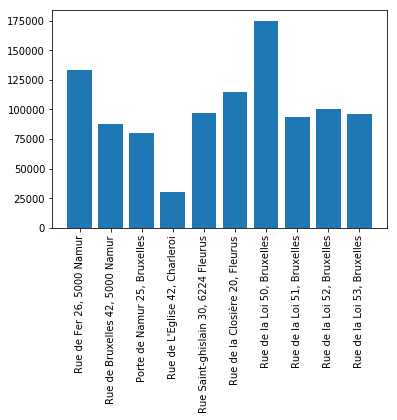

In [86]:
from matplotlib import pyplot as plt

plt.bar(newdf.address,newdf.price_per_room)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

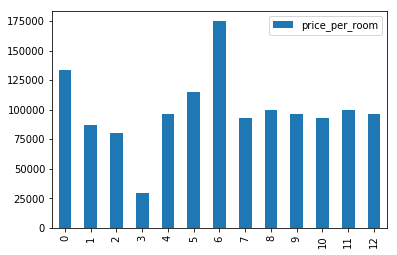

In [87]:
#méthode intégrée de pandas
newdf.plot.bar(y="price_per_room")
plt.xticks(rotation=90)           

In [88]:
#On retire les données extrêmes
df2 = newdf.drop([2,6]) #détection manuelle (visuelle)
df2

,address,city,price,price_per_m2,price_per_room,rooms,surface,website
0,"Rue de Fer 26, 5000 Namur",Namur,400000.0,2666.666667,133333.333333,3.0,150,immoweb
1,"Rue de Bruxelles 42, 5000 Namur",Namur,350000.0,1750.000000,87500.000000,4.0,200,immoweb
3,"Rue de L'Eglise 42, Charleroi",Charleroi,150000.0,1000.000000,30000.000000,5.0,150,immoweb
4,"Rue Saint-ghislain 30, 6224 Fleurus",Fleurus,290000.0,906.250000,96666.666667,3.0,320,immoweb
5,"Rue de la Closière 20, Fleurus",Fleurus,230000.0,1314.285714,115000.000000,2.0,175,immoweb
7,"Rue de la Loi 51, Bruxelles",Bruxelles,280000.0,2333.333333,93333.333333,3.0,120,immoweb
8,"Rue de la Loi 52, Bruxelles",Bruxelles,400000.0,2666.666667,100000.000000,4.0,150,immovlan
9,"Rue de la Loi 53, Bruxelles",Bruxelles,480000.0,2400.000000,96000.000000,5.0,200,immovlan
10,"Rue de la Loi 51, Bruxelles",Bruxelles,280000.0,2333.333333,93333.333333,3.0,120,immovlan
11,"Rue de la Loi 52, Bruxelles",Bruxelles,400000.0,2666.666667,100000.000000,4.0,150,immovlan


In [89]:
df2.groupby("rooms").mean()

,price,price_per_m2,price_per_room,surface
rooms,,,,
2.0,230000.000000,1314.285714,115000.000000,175.000000
3.0,312500.000000,2059.895833,104166.666667,177.500000
4.0,383333.333333,2361.111111,95833.333333,166.666667
5.0,370000.000000,1933.333333,74000.000000,183.333333


* Après avoir retiré les donénes extrêmes, l'évolution du prix en fonction du nombre de chambres est plus cohérent.
* On remarque que le prix au m2 augmente, mais que le prix par pièce diminue

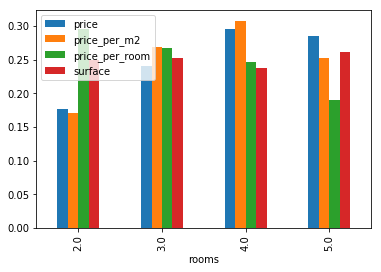

In [90]:
result = df2.groupby("rooms").mean()
#Divide each column by its sum (so that sum is 1) - so that multiple bar plots with various orders are visible
result = result/result.sum()
result.plot(kind="bar")

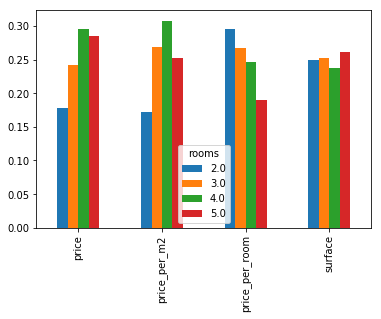

In [91]:
#plus lisible (on transpose pour avoir un graphe par varible plutôt que par nombre de chambres)
result.transpose().plot(kind="bar")

On remarque en effet que:
* le prix augmente
* la surface diminue
* le prix au m2 augmente (logiquement)
* le prix par pièce diminue

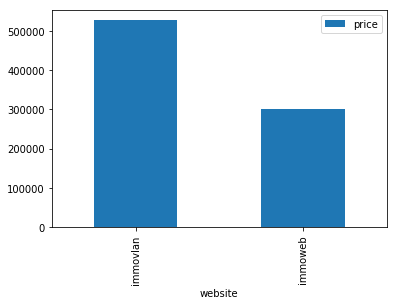

In [92]:
website_comparison = df.groupby("website").mean()
website_comparison.plot.bar(y="price")

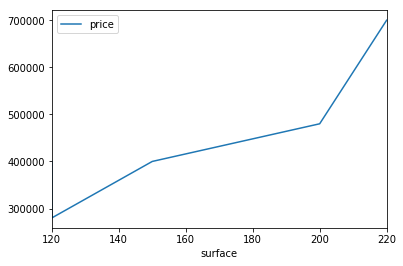

In [93]:
#DF.plot: afficher une courbe. On trie d'abord les maisons par surface croissante pour afficher la courbe (DF.sort_values("surface"))
bxldf.sort_values("surface").plot("surface","price")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f895c49d4a8>,
      dtype=object)

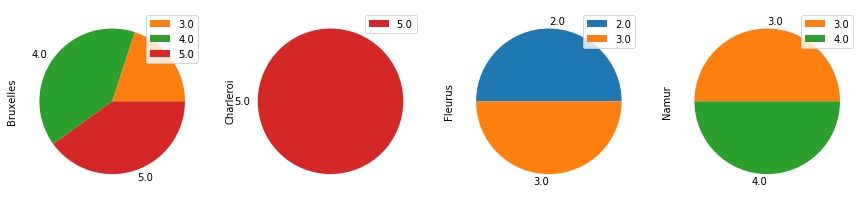

In [94]:
count_analysis.plot.pie(subplots = True, figsize = (15,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f895c3e7c18>,
      dtype=object)

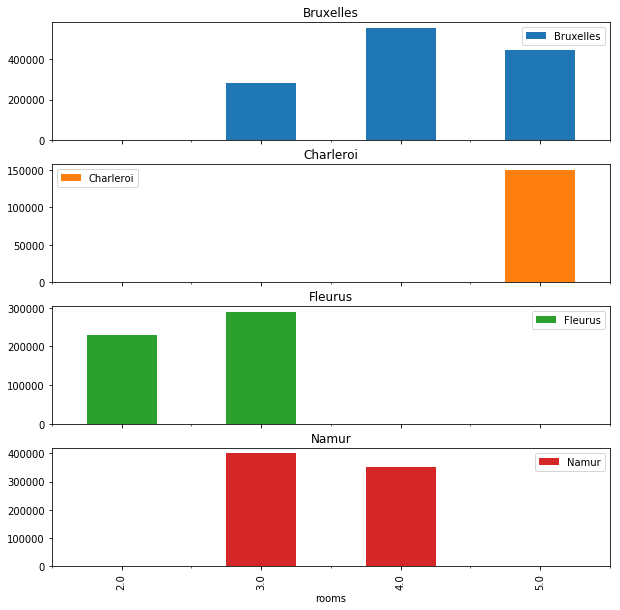

In [95]:

price_analysis.plot.bar(subplots = True, figsize = (10,10))